In [0]:


# TODO
# Add title to each figure
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline
print('Bla test')

Populating the interactive namespace from numpy and matplotlib
Bla test


In [0]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/master/fbb.mplstyle")


# data ingestion

read in the first 10 files, in alphabetical order, in the https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs Stock dataset. Follow [this notebook](https://github.com/fedhere/MLTSA_FBianco/blob/master/CodeExamples/Kaggledata_load.ipynb) for guidance on how to programmatically access the Kaggle data. The data must be accessed from a google colab notebook programmatically using the Kaggle API and software. 
Note: to sort file alphabecially you can use the glob package and the sort function of numpy:

The files need to be in a single dataframe with "Date" as index. 

Read in each file (e.g. with ```pd.read_csv()``` into a dataframe. Merge each df recursively with the precious one using the ```merge()``` method of dataframes, mergin on "Date". Use only the "Close" column (the price at closing). Rename  each column by the name of the file (e.g. the "Close" column of the "a.us.txt" file should be named "a.us"


There is a partial solution available in the slides (very last slide in [MLTSA2](https://slides.com/federicabianco/mltsa2/live?context=editing#/14/1))



In [0]:
# ---------------------------------------------------------
# Read first 10 files in alphabetical order from above link
# ---------------------------------------------------------
# Create Kaggle environment
!pip install kaggle
from google.colab import drive
drive.mount("/content/gdrive")
#drive.mount("/content/gdrive")
#!kaggle datasets list -s finance 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!pwd
#cd gdrive/My\ Drive
#%ls
!pwd
#!cd gdrive/My\ Drive

/content


In [0]:
#%pwd

#%ls
%cd gdrive/

/content/gdrive


In [0]:
%cd My\ Drive

/content/gdrive/My Drive


In [0]:
#cd My\ Drive
!pwd
#%ls
#cd gdrive/

/content/gdrive/My Drive


In [0]:
#%ls

In [0]:
!pwd
%ls kaggle.json

/content/gdrive/My Drive
kaggle.json


In [0]:
!chmod 600 kaggle.json

In [0]:
import json
import os
'''
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']'''

'\nimport json\nimport os\nenvs = json.load(open("kaggle.json", "r"))\nos.environ["KAGGLE_USERNAME"] = envs[\'username\']\nos.environ["KAGGLE_KEY"] = envs[\'key\']'

In [0]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [0]:
os.environ

environ({'ENV': '/root/.bashrc', 'GCS_READ_CACHE_BLOCK_SIZE_MB': '16', 'CLOUDSDK_CONFIG': '/content/.config', 'CUDA_VERSION': '10.1.243', 'PATH': '/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin', 'HOME': '/root', 'LD_LIBRARY_PATH': '/usr/local/nvidia/lib:/usr/local/nvidia/lib64', 'LANG': 'en_US.UTF-8', 'SHELL': '/bin/bash', 'LIBRARY_PATH': '/usr/local/cuda/lib64/stubs', 'CUDA_PKG_VERSION': '10-1=10.1.243-1', 'SHLVL': '1', 'GCE_METADATA_TIMEOUT': '0', 'NCCL_VERSION': '2.4.8', 'NVIDIA_VISIBLE_DEVICES': 'all', 'TF_FORCE_GPU_ALLOW_GROWTH': 'true', 'DEBIAN_FRONTEND': 'noninteractive', 'CUDNN_VERSION': '7.6.5.32', 'LAST_FORCED_REBUILD': '20200204', 'JPY_PARENT_PID': '18', 'PYTHONPATH': '/env/python', 'DATALAB_SETTINGS_OVERRIDES': '{"kernelManagerProxyPort":6000,"kernelManagerProxyHost":"172.28.0.3","jupyterArgs":["--ip=\\"172.28.0.2\\""]}', 'NO_GCE_CHECK': 'True', 'GLIBCXX_FORCE_NEW':

In [0]:
!kaggle datasets list -s stock

ref                                                       title                                           size  lastUpdated          downloadCount  
--------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
borismarjanovic/price-volume-data-for-all-us-stocks-etfs  Huge Stock Market Dataset                      492MB  2017-11-16 14:53:29          49673  
dgawlik/nyse                                              New York Stock Exchange                         31MB  2017-02-22 10:18:25          37670  
camnugent/sandp500                                        S&P 500 stock data                              19MB  2018-02-10 03:15:53          24708  
aaron7sun/stocknews                                       Daily News for Stock Market Prediction           6MB  2019-11-13 18:22:52          28315  
rpaguirre/tesla-stock-price                               Tesla Stock Price                               

In [0]:
#!mkdir StockData
#cd StockData 
%ls StockData

Data/  ETFs/  price-volume-data-for-all-us-stocks-etfs.zip  Stocks/


In [0]:
cd StockData/

/content/gdrive/My Drive/StockData


In [0]:
!kaggle datasets download borismarjanovic/price-volume-data-for-all-us-stocks-etfs

price-volume-data-for-all-us-stocks-etfs.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
%ls
!unzip  price-volume-data-for-all-us-stocks-etfs.zip

  inflating: Stocks/cytxw.us.txt     
  inflating: Stocks/czfc.us.txt      
  inflating: Stocks/cznc.us.txt      
  inflating: Stocks/czr.us.txt       
  inflating: Stocks/czwi.us.txt      
  inflating: Stocks/czz.us.txt       
  inflating: Stocks/d.us.txt         
  inflating: Stocks/dac.us.txt       
  inflating: Stocks/daio.us.txt      
  inflating: Stocks/dakt.us.txt      
  inflating: Stocks/dal.us.txt       
  inflating: Stocks/dalt.us.txt      
  inflating: Stocks/dan.us.txt       
  inflating: Stocks/dar.us.txt       
  inflating: Stocks/dare.us.txt      
  inflating: Stocks/data.us.txt      
  inflating: Stocks/dave.us.txt      
  inflating: Stocks/dax.us.txt       
  inflating: Stocks/db.us.txt        
  inflating: Stocks/dbd.us.txt       
  inflating: Stocks/dbes.us.txt      
  inflating: Stocks/dbit.us.txt      
  inflating: Stocks/dbl.us.txt       
  inflating: Stocks/dbrt.us.txt      
  inflating: Stocks/dbvt.us.txt      
  inflating: Stocks/dcf.us.txt       
  inflating:

In [0]:
#!kaggle datasets download timoboz/tesla-stock-data-from-2010-to-2020

In [0]:
!ls

Data  ETFs  price-volume-data-for-all-us-stocks-etfs.zip  Stocks


In [0]:
#!ls Data/Stocks/
cd Data/Stocks/   

/content/gdrive/My Drive/StockData/Data/Stocks


# Read data in alphabatical **[order](*https://*)**

In [0]:
import glob


In [0]:
sorted(glob.glob('*.txt'))


['a.us.txt',
 'aa.us.txt',
 'aaap.us.txt',
 'aaba.us.txt',
 'aac.us.txt',
 'aal.us.txt',
 'aamc.us.txt',
 'aame.us.txt',
 'aan.us.txt',
 'aaoi.us.txt',
 'aaon.us.txt',
 'aap.us.txt',
 'aapl.us.txt',
 'aat.us.txt',
 'aau.us.txt',
 'aav.us.txt',
 'aaww.us.txt',
 'aaxn.us.txt',
 'ab.us.txt',
 'abac.us.txt',
 'abax.us.txt',
 'abb.us.txt',
 'abbv.us.txt',
 'abc.us.txt',
 'abcb.us.txt',
 'abcd.us.txt',
 'abco.us.txt',
 'abdc.us.txt',
 'abe.us.txt',
 'abeo.us.txt',
 'abeow.us.txt',
 'abev.us.txt',
 'abg.us.txt',
 'abil.us.txt',
 'abio.us.txt',
 'ablx.us.txt',
 'abm.us.txt',
 'abmd.us.txt',
 'abr.us.txt',
 'abr_a.us.txt',
 'abr_b.us.txt',
 'abr_c.us.txt',
 'abrn.us.txt',
 'abt.us.txt',
 'abtx.us.txt',
 'abus.us.txt',
 'abx.us.txt',
 'aby.us.txt',
 'ac.us.txt',
 'acad.us.txt',
 'acbi.us.txt',
 'acc.us.txt',
 'acco.us.txt',
 'accp.us.txt',
 'acer.us.txt',
 'acerw.us.txt',
 'acet.us.txt',
 'acfc.us.txt',
 'acgl.us.txt',
 'acglo.us.txt',
 'acglp.us.txt',
 'ach.us.txt',
 'achc.us.txt',
 'achn.us.tx

In [0]:
#read_data[0:5] = np.array


In [0]:
'''
data_sort = glob.glob("[a-z]*.txt")
print(data_sort[0:10])
'''

['svm.us.txt', 'sui_a.us.txt', 'suns.us.txt', 'susa.us.txt', 'stly.us.txt', 'tbb.us.txt', 'tbph.us.txt', 'syrs.us.txt', 'ta.us.txt', 'stml.us.txt']


In [0]:
'''
#for ii in data_sort:
#  print(ii)
MaxFileRead = 10 # Sets maximum number of files to read; Here it is 10
read_data = {}  # Creates a dictionary 
for ii in range(MaxFileRead):
  #print(data_sort[ii])
  print("data reading ", ii)
  read_data[ii] = pd.read_csv(str(data_sort[ii]))    # Reads data and puts them in dictionary read_data[ii]
print(read_data[0])'''

data reading  0
data reading  1
data reading  2
data reading  3
data reading  4
data reading  5
data reading  6
data reading  7
data reading  8
data reading  9
           Date    Open    High     Low   Close  Volume  OpenInt
0    2017-05-16  3.3691  3.3691  3.1697  3.2993  171569        0
1    2017-05-17  3.3392  3.3392  3.1996  3.2494  168509        0
2    2017-05-18  3.2494  3.2494  3.0202  3.0202  131396        0
3    2017-05-19  2.9903  3.1099  2.9803  3.0202  117986        0
4    2017-05-22  3.0102  3.2395  3.0102  3.1797  157185        0
..          ...     ...     ...     ...     ...     ...      ...
121  2017-11-06  2.5000  2.6300  2.5000  2.5900  323045        0
122  2017-11-07  2.6000  2.6200  2.4910  2.5400  299010        0
123  2017-11-08  2.6000  2.6088  2.5500  2.5700  226568        0
124  2017-11-09  2.5200  2.5700  2.5100  2.5500  166537        0
125  2017-11-10  2.5500  2.5500  2.4600  2.4700  237598        0

[126 rows x 7 columns]


In [0]:
'''
alltss = []
allfiles = np.sort(np.array(glob.glob("*.txt")))[:10]
tss = pd.read_csv(allfiles[0])[["Date", 
	
                                "Close"]].rename({
	
  "Close":data_sort[0].replace(".txt","")}, axis=1)
                                
for f in allfiles[1:]:
	
    print(f)
	
    name = f.replace(".txt","")
	
    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename(
	
      {"Close":name}, axis=1), on="Date")
	
tss.set_index("Date", inplace=True)     
# Not sure how it worked with date argument     '''                       

aa.us.txt
aaap.us.txt
aaba.us.txt
aac.us.txt
aal.us.txt
aamc.us.txt
aame.us.txt
aan.us.txt
aaoi.us.txt


In [0]:
import glob
	
alltss = []
	
 
	
allfiles = np.sort(np.array(glob.glob("*.txt")))[:10]
	
tss = pd.read_csv(allfiles[0])[["Date", 
	
                                "Close"]].rename({
	
  "Close":allfiles[0].replace(".txt","")}, axis=1)
	
for f in allfiles[1:]:
	
    print(f)
	
    name = f.replace(".txt","")
	
    
	
    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename(
	
      {"Close":name}, axis=1), on="Date")
	
tss.set_index("Date", inplace=True)

aa.us.txt
aaap.us.txt
aaba.us.txt
aac.us.txt
aal.us.txt
aamc.us.txt
aame.us.txt
aan.us.txt
aaoi.us.txt


In [0]:
#sorted(glob.glob(datasets list -s stock), key=os.path.getmtime)

In [0]:

print ("shape of the dataset:", tss.shape)

shape of the dataset: (447, 10)


In [0]:
print(tss.columns)

Index(['a.us', 'aa.us', 'aaap.us', 'aaba.us', 'aac.us', 'aal.us', 'aamc.us',
       'aame.us', 'aan.us', 'aaoi.us'],
      dtype='object')


#  data inspection

plot each time series (ts)

In [0]:
'''
for c in tss.columns:
  print(c)
'''
print(tss.columns[0])


a.us


i

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


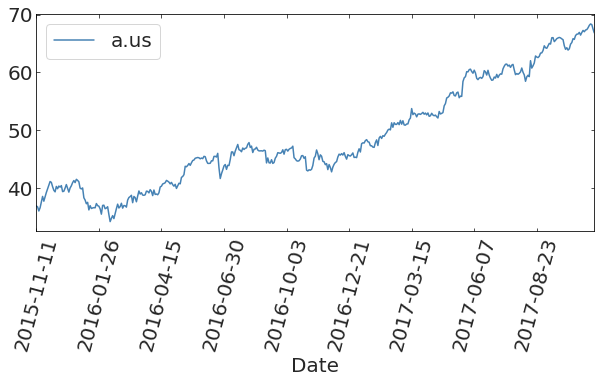

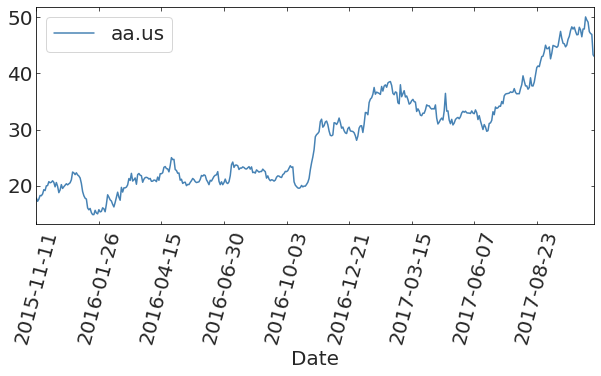

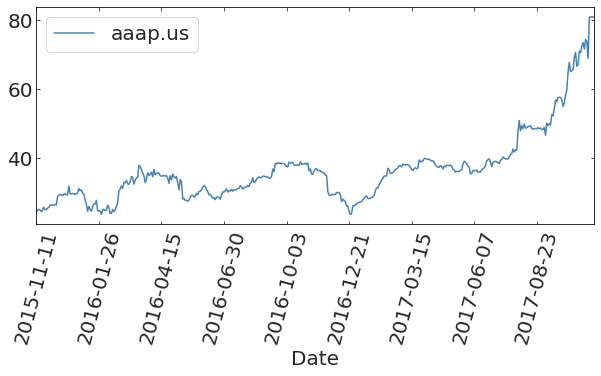

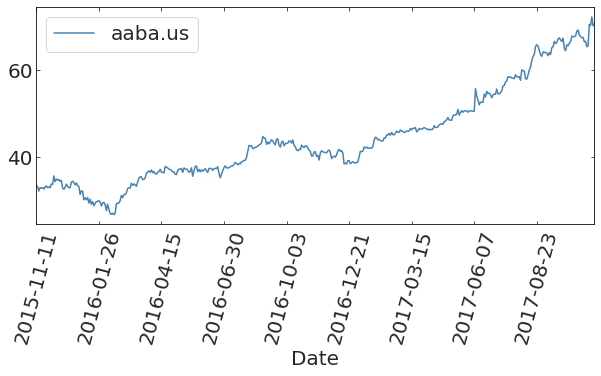

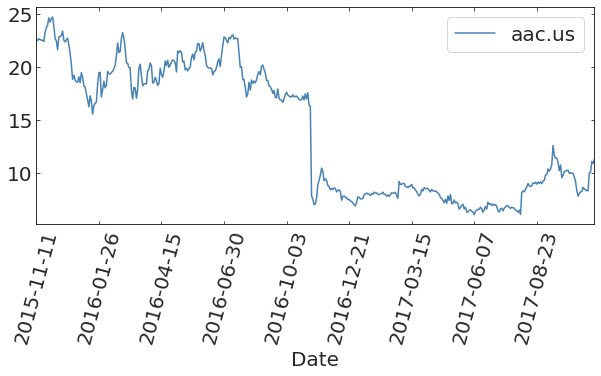

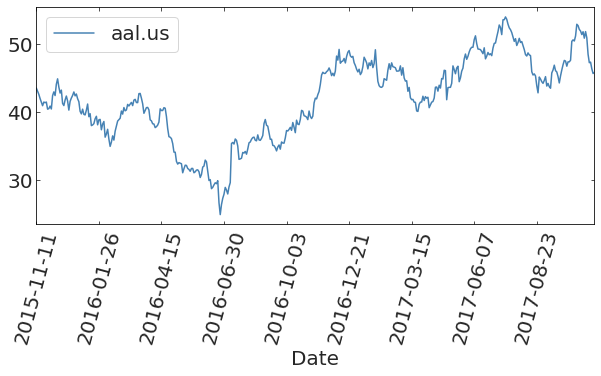

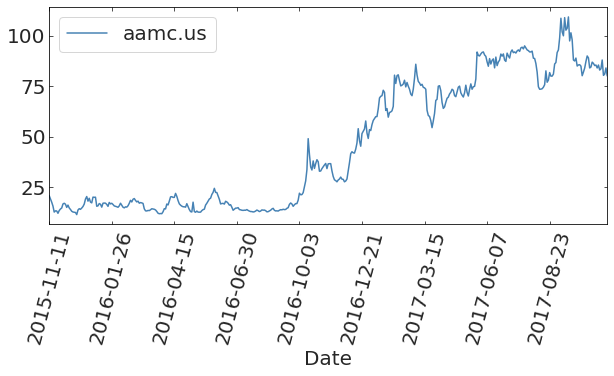

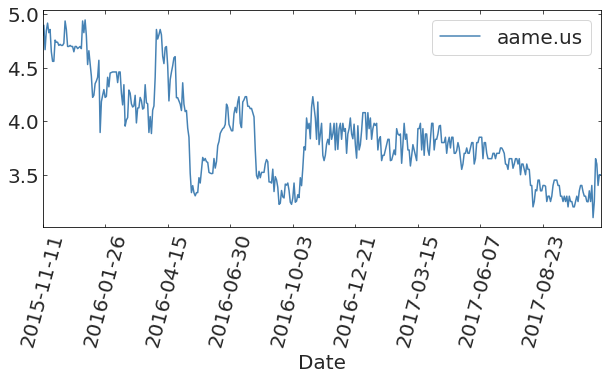

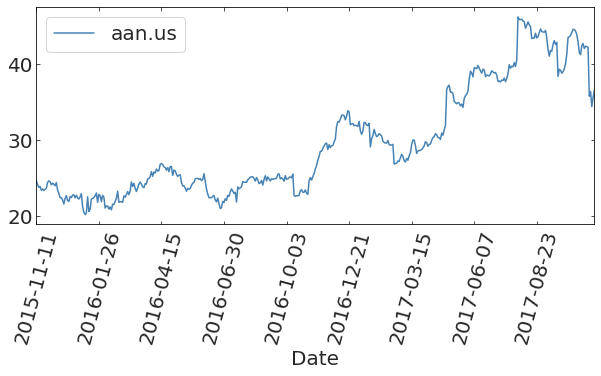

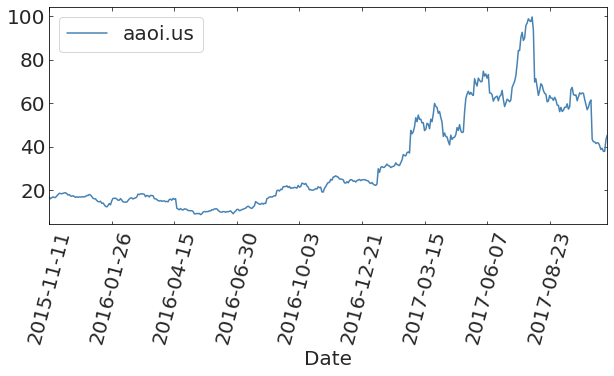

In [0]:
for c in tss.columns:
      fig, ax = pl.subplots(figsize=(10,4))
      tss.plot(y=c, ax=ax, rot=75)
# Add labels ????

## visualizing correlations

use ```pandas.plotting.scatter_matrix```  to look at the relationship between lightcurves

plot the pairwise correlation as a heatmap using ```pl.imshow()```. You can access the pairwise correlation with the dataframe method ```df.corr()```

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f127b0601d0>,
      dtype=object)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


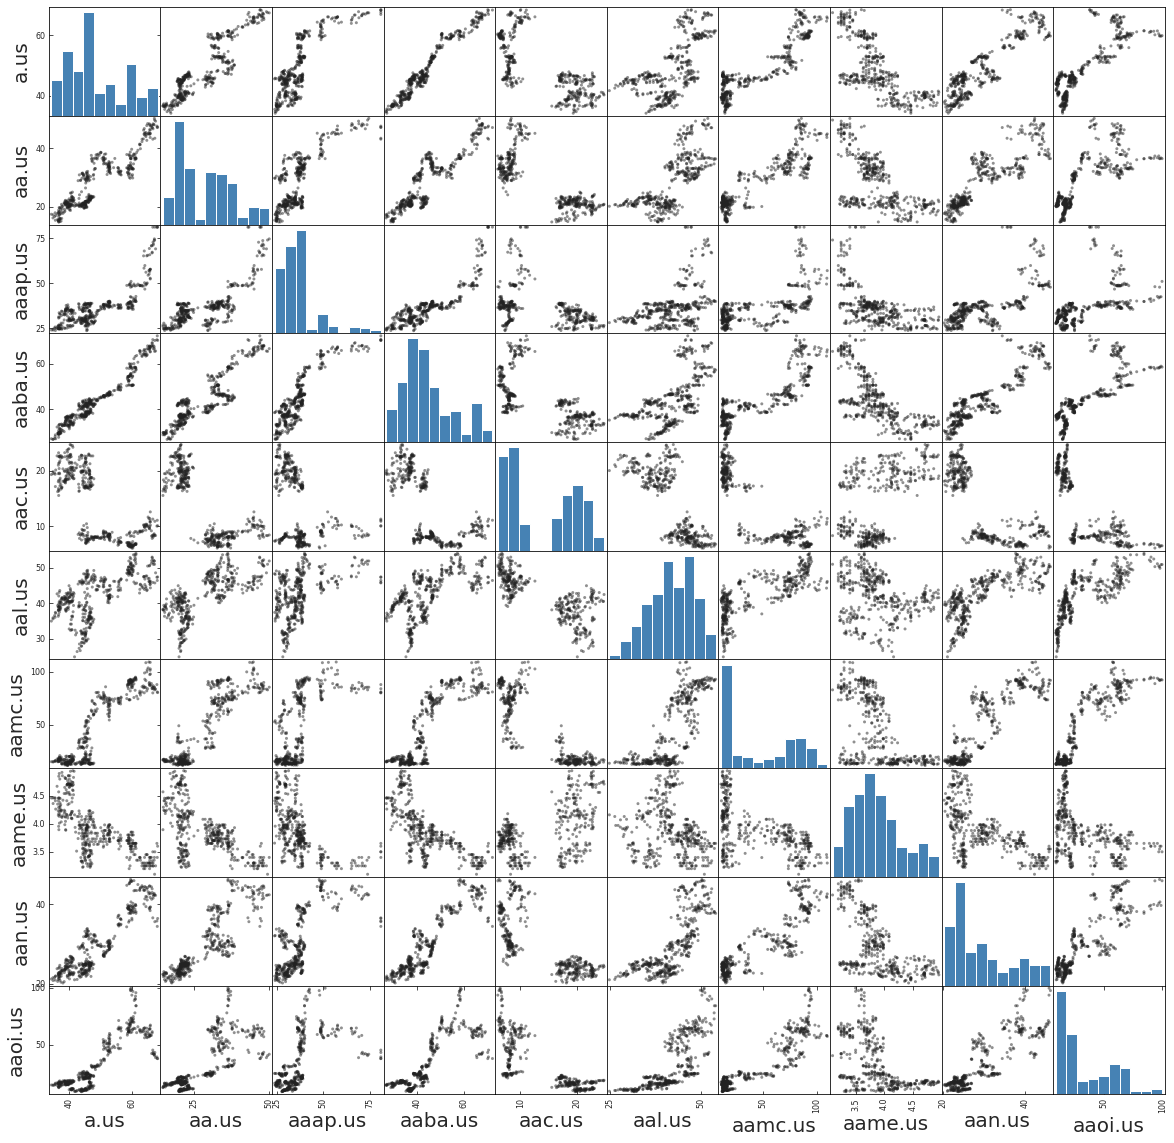

In [0]:
from pandas.plotting import scatter_matrix
#ax, fig = pl.subplots(1, figsize=(10,10))
scatter_matrix(tss, color="#222222", figsize=(20,20))


In [0]:
tss.corr()

,a.us,aa.us,aaap.us,aaba.us,aac.us,aal.us,aamc.us,aame.us,aan.us,aaoi.us
a.us,1.000000,0.902139,0.800310,0.973457,-0.721867,0.621041,0.897263,-0.699609,0.905395,0.851239
aa.us,0.902139,1.000000,0.776600,0.904210,-0.791137,0.713229,0.893952,-0.606774,0.873520,0.766459
aaap.us,0.800310,0.776600,1.000000,0.872134,-0.423021,0.451520,0.621329,-0.573976,0.696179,0.560427
aaba.us,0.973457,0.904210,0.872134,1.000000,-0.670578,0.612989,0.849972,-0.709023,0.903785,0.809059
aac.us,-0.721867,-0.791137,-0.423021,-0.670578,1.000000,-0.785248,-0.868936,0.510986,-0.765267,-0.780147
aal.us,0.621041,0.713229,0.451520,0.612989,-0.785248,1.000000,0.780517,-0.219258,0.756808,0.746505
aamc.us,0.897263,0.893952,0.621329,0.849972,-0.868936,0.780517,1.000000,-0.544740,0.881631,0.904166
aame.us,-0.699609,-0.606774,-0.573976,-0.709023,0.510986,-0.219258,-0.544740,1.000000,-0.585002,-0.496371
aan.us,0.905395,0.873520,0.696179,0.903785,-0.765267,0.756808,0.881631,-0.585002,1.000000,0.860847
aaoi.us,0.851239,0.766459,0.560427,0.809059,-0.780147,0.746505,0.904166,-0.496371,0.860847,1.000000


([<matplotlib.axis.YTick at 0x7f12786576d8>,
 <a list of 10 Text yticklabel objects>)

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


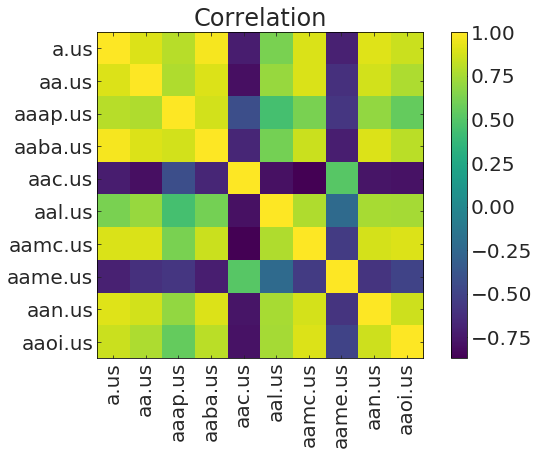

In [0]:
pl.imshow(tss.corr())
pl.colorbar()
pl.title("Correlation")
pl.xticks(range(len(tss.columns)), tss.columns, rotation=90)
pl.yticks(range(len(tss.columns)), tss.columns)

## testing for stationarity
 **test** if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [0]:
import statsmodels.api as sm

In [0]:
threshold = 0.05
for c in tss.columns[:10]:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)
print("...")

a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False
...


## measure autocorrelation

In [0]:
#print(tss.columns[0])
print(sm.tsa.stattools.adfuller(tss[c]))


(-1.3382832125479953, 0.6114808797718178, 3, 443, {'1%': -3.4451978474132234, '5%': -2.8680864144212057, '10%': -2.5702569996789792}, 1942.6170220811841)


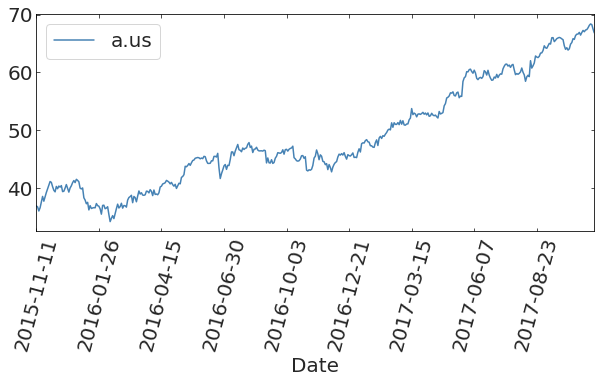

In [0]:
#for c in tss.columns:
fig, ax = pl.subplots(figsize=(10,4))
tss.plot(y=tss.columns[0], ax=ax, rot=75)
# Don't understand ??

#tss.acorr(y=tss.columns[0], ax = ax)
#fig = sm.graphics.tsa.plot_acf(y=tss.columns[0], lags=80)

In [0]:
sm.graphics.tsa.plot_pacf?

In [0]:
matplotlib.pyplot.acorr?

In [0]:
'''
#fig, ax = pl.subplots(figsize=(10,4))
#tss.plot(tss.columns[0], ax=ax, rot=75)
print(tss.shape)
y = tss.columns[0]
print(tss.y.shape)
'''

'\n#fig, ax = pl.subplots(figsize=(10,4))\n#tss.plot(tss.columns[0], ax=ax, rot=75)\nprint(tss.shape)\ny = tss.columns[0]\nprint(tss.y.shape)\n'

plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary

In [0]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import statsmodels.graphics as sg
#statsmodels.graphics.tsaplots.plot_acf(c, lags = 80)
#fig = sm.graphics.tsa.plot_acf(tss.columns[0][1], lags=80)
#fig = sm.graphics.tsa.plot_pacf(tss.columns[0], lags=80)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


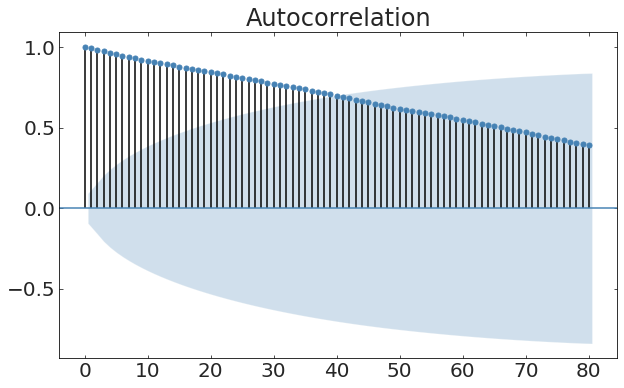

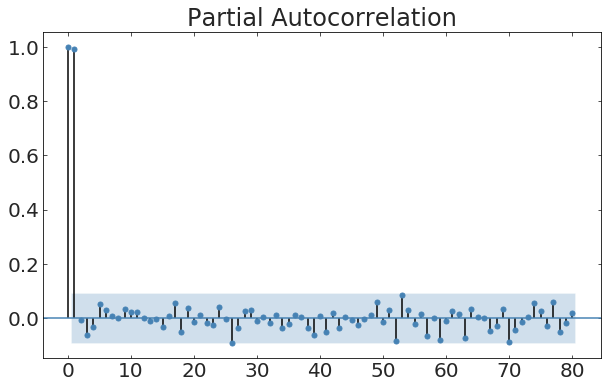

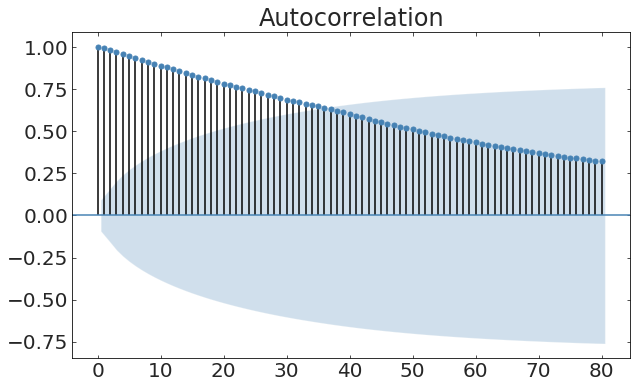

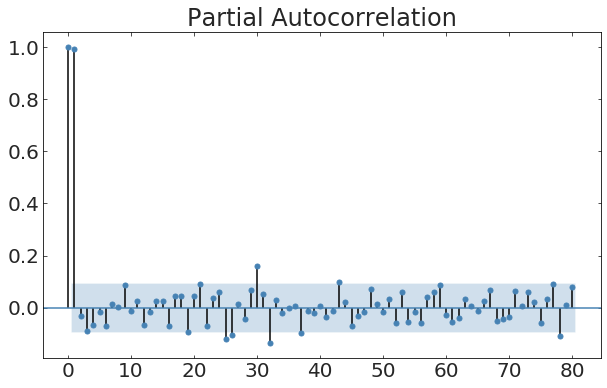

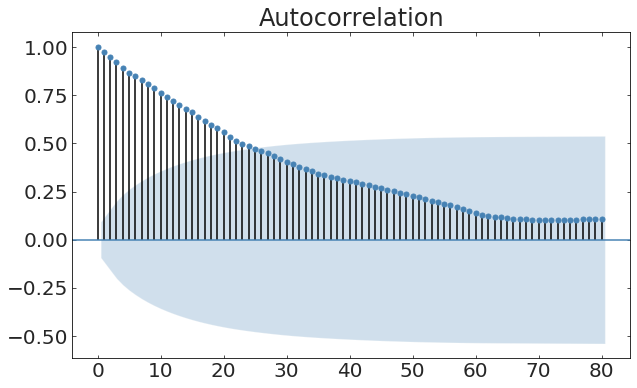

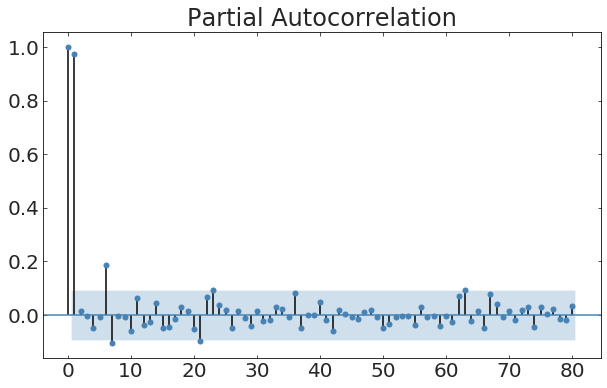

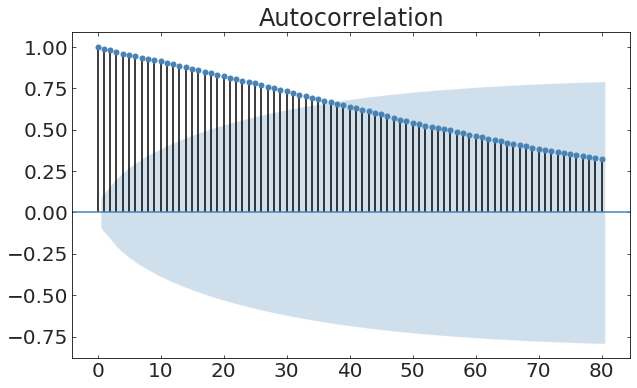

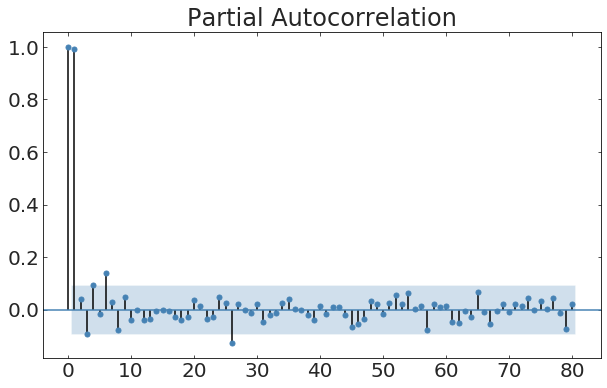

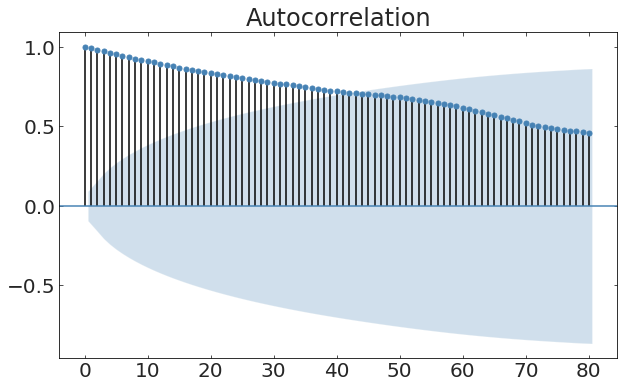

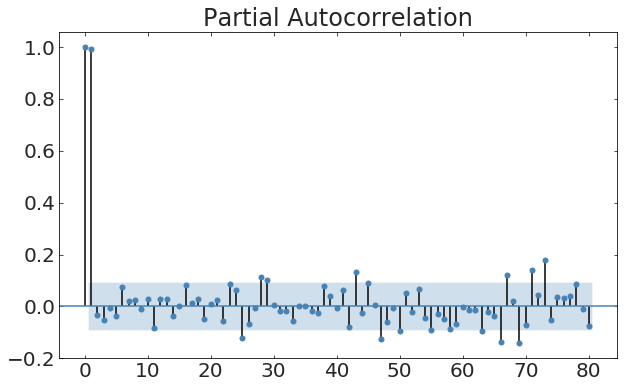

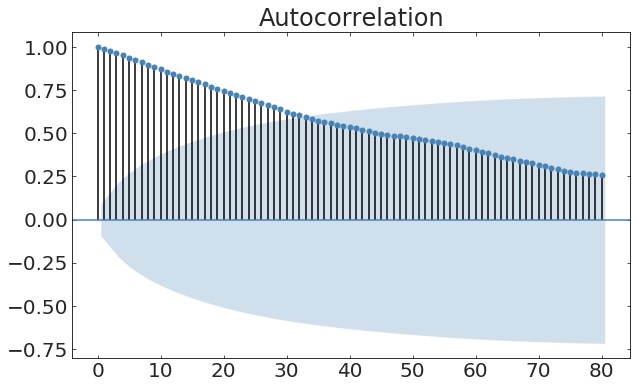

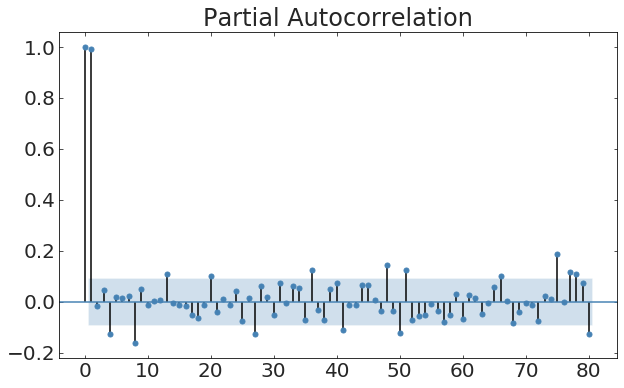

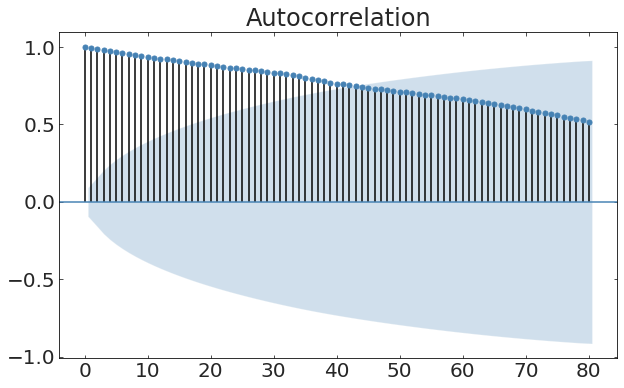

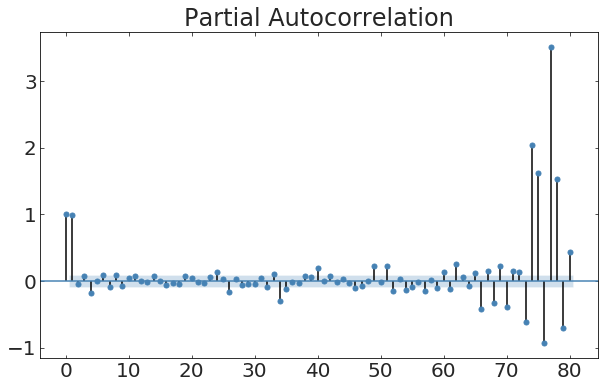

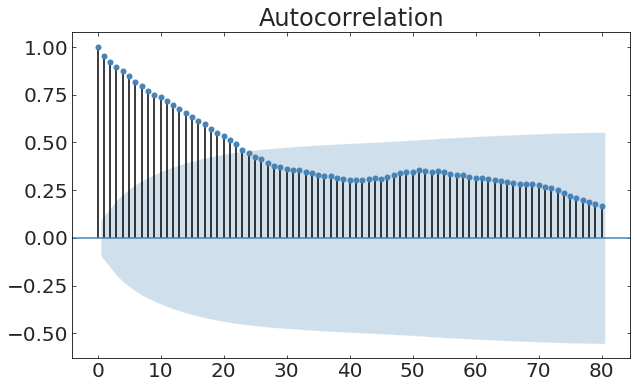

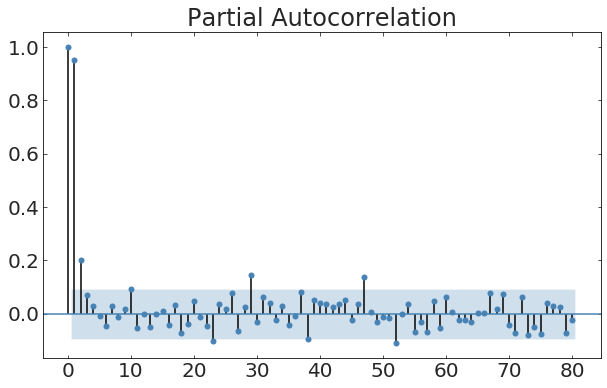

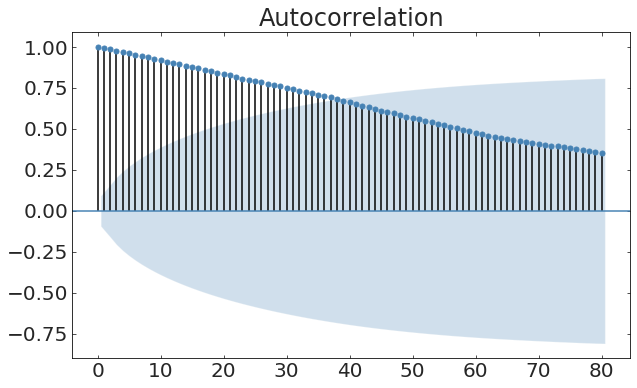

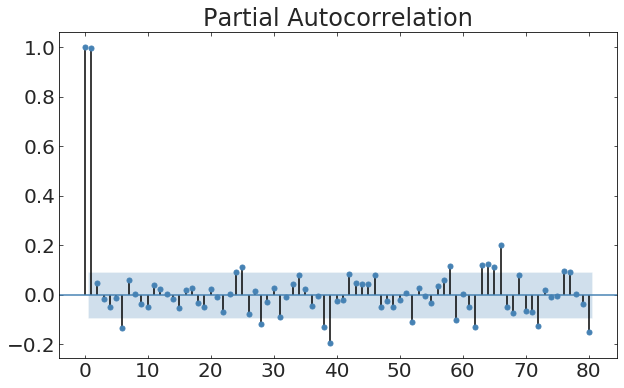

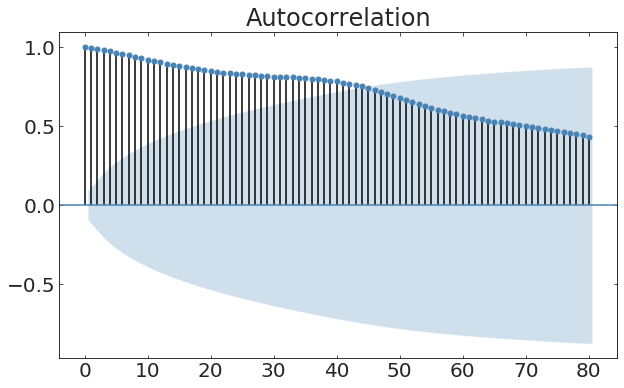

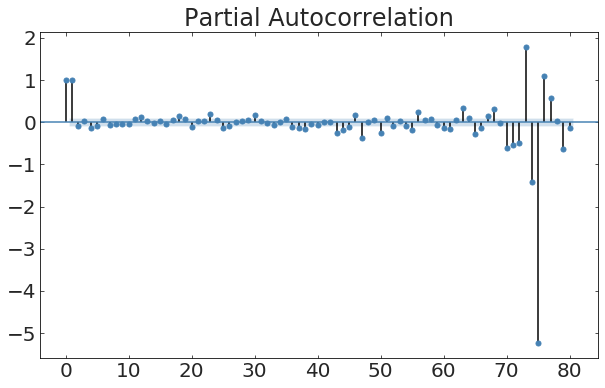

In [0]:
#c = tss.columns[0]
for c in tss.columns:
  c = pd.Series(tss[c])
  sg.tsaplots.plot_acf(c, lags = 80)
  sg.tsaplots.plot_pacf(c, lags = 80)



# Fit one of the stationary time series with ARMA

To fit the model to the data use ```statsmodels.api.tsa.ARMA```

Inspect the function call as ```statsmodels.api.tsa.ARMA?```

The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

For at least one model look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC (Akaike Information Criterion)

See https://github.com/fedhere/A-Data-Driven-Evaluation-of-Delays-in-Criminal-Prosecution/blob/master/CodeExamples/ARMA/testingARMA_ARIMA.ipynb

## 1 Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters
## 2. record the aic score for each fit
## 3. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [0]:
statsmodels.api.tsa.ARMA?

In [0]:
#example of model output
mod = sm.tsa.ARMA(tss[['aame.us']], (1,1)).fit()

#(tss[c], (3,1), dates=tss["Date"], ).fit()
#mod.plot_predict(dynamic=True, plot_insample=False)
mod.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Thu, 27 Feb 2020   AIC                           -594.115
Time:                        04:05:31   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     -5.576      0.000      -0.366      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            3.6958           +0.0000j            3.6958            0.0000
-----------------------------------------------------------------------------
"""

**What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC (Akaike Information Criterion)**

Ans : The best fit parameters according to the summary above are :
* constant : 3.9275 with uncertainty of 0.204 i.e. std err
* ar.L1.aame.us 0.9811 with uncertainty of 0.010
* ma.L1.aame.us -0.2706 with uncertainty of 0.049
* and the value of AIC is -594.115






> Indented block



In [0]:
print(mod.aic)

-594.1149218798437


In [0]:
aics_st = np.zeros((5,5))
aics_st[:] = np.nan

for p in range(5):
    for q in range(5):
        try :
            mod = sm.tsa.ARMA(tss[['aame.us']], (p,q)).fit()
            print(mod.aic)
            aics_st[p,q] = mod.aic

        except :
            pass
print("best parameters: ", np.where(aics_st == np.nanmin(aics_st)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

522.0196275870962
106.23491009614554
-130.21340756720542
-245.70555256615467
-323.71484051098173
-568.1307057346728


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-594.1149218798437
-592.2582741547974


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-590.4374948591164


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-588.5536108645749
-591.4727386903519


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-592.2792517067387


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-590.1748845133147


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-588.4783451985861


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-591.5466830206851


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-590.3828867548807


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-588.4252971636943


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-593.8307998561875
-590.4940463691241


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-588.5159731320841


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-586.5583548840095


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-591.4667760551715


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


-589.7305869980894
best parameters:  (array([1]), array([1]))


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [0]:
#best parameters:  (array([1]), array([1]))

## 4. predict the in-set and the future alues

you can use ```mod.plot_predict()``` to visualize them

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


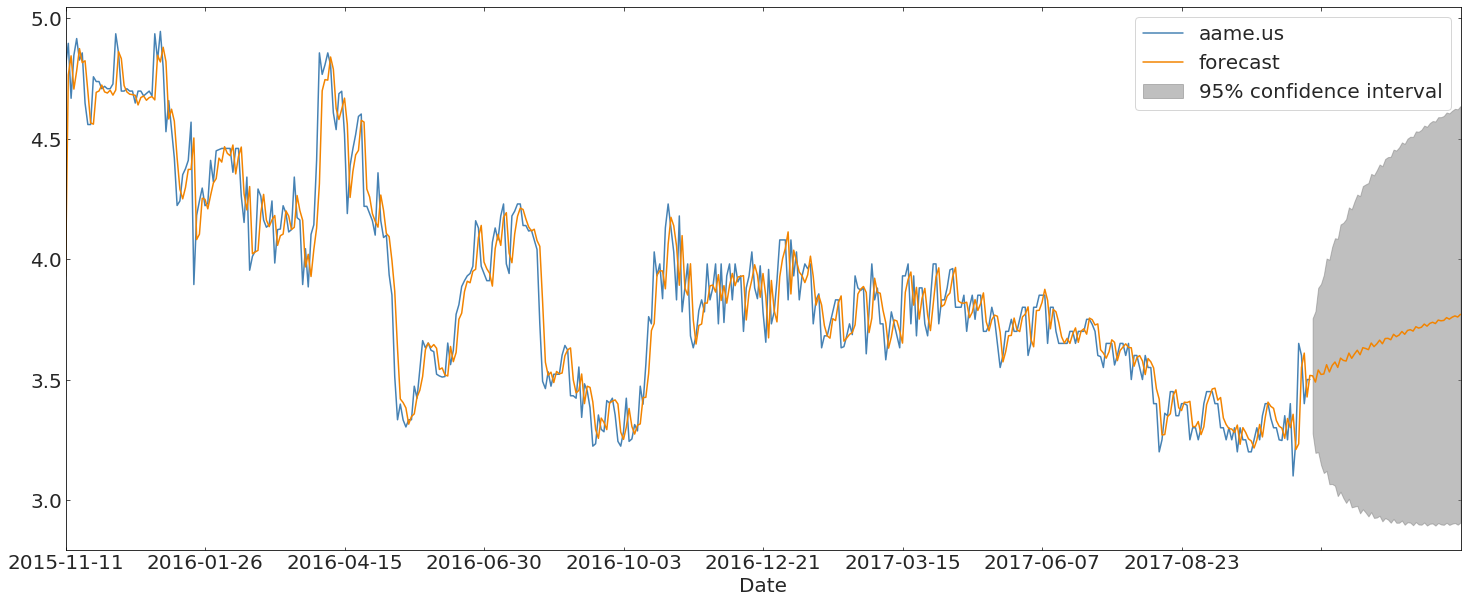

In [0]:
ax = tss[['aame.us']].plot(figsize=(25,10))
mod.plot_predict(end=500, plot_insample=False, ax=ax);

[link text](https://)# 3.5 what are the coefficients of the best fit model? what do they mean? 


#  choose 2 non stationary time series in the set that are not correlated and repeat steps 3.1-3.4 with the ARIMA model

choose a value of the integration order that is reasonable ...

In [0]:
import statsmodels.api as sm
sm.tsa.ARIMA.fit?
#statsmodels.tsa.arima_model.ARIMA?

# Non Stationary Example 2

In [0]:
aics_st2 = np.zeros((5,5))
#aics_st2[:] = np.nan
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(tss[['aaap.us']], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

d = 5
for p in range(5):
    for q in range(5):
        try :
            model = ARIMA(tss[['aaap.us']], order=(p,d,q))
            model_fit = model.fit(disp=0)
            #mod = sm.tsa.ARMA(tss[['aaap.us']], (p, d, q)).fit()
            #print(model_fit.aic)
            aics_st2[p,q] = model_fit.aic
        except :
            pass
print("best parameters: ", np.where(aics_st2 == np.nanmin(aics_st2)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:              D.aaap.us   No. Observations:                  446
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -722.481
Method:                       css-mle   S.D. of innovations              1.223
Date:                Thu, 27 Feb 2020   AIC                           1458.961
Time:                        04:20:02   BIC                           1487.664
Sample:                             1   HQIC                          1470.278
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1276      0.055      2.335      0.020       0.020       0.235
ar.L1.D.aaap.us    -0.1149      0.047     -2.430      0.015      -0.208      -0.022
ar.L2.D.aaap.us    -0.0552      

In [0]:
print(aics_st2)
print(np.nanmin(aics_st2))
np.where(aics_st2 == np.nanmin(aics_st2))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
0.0


(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
        4, 4, 4]),
 array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4]))

In [0]:
print("best parameters: ", np.where(aics_st2 == np.nanmin(aics_st2)))

best parameters:  (array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4]), array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


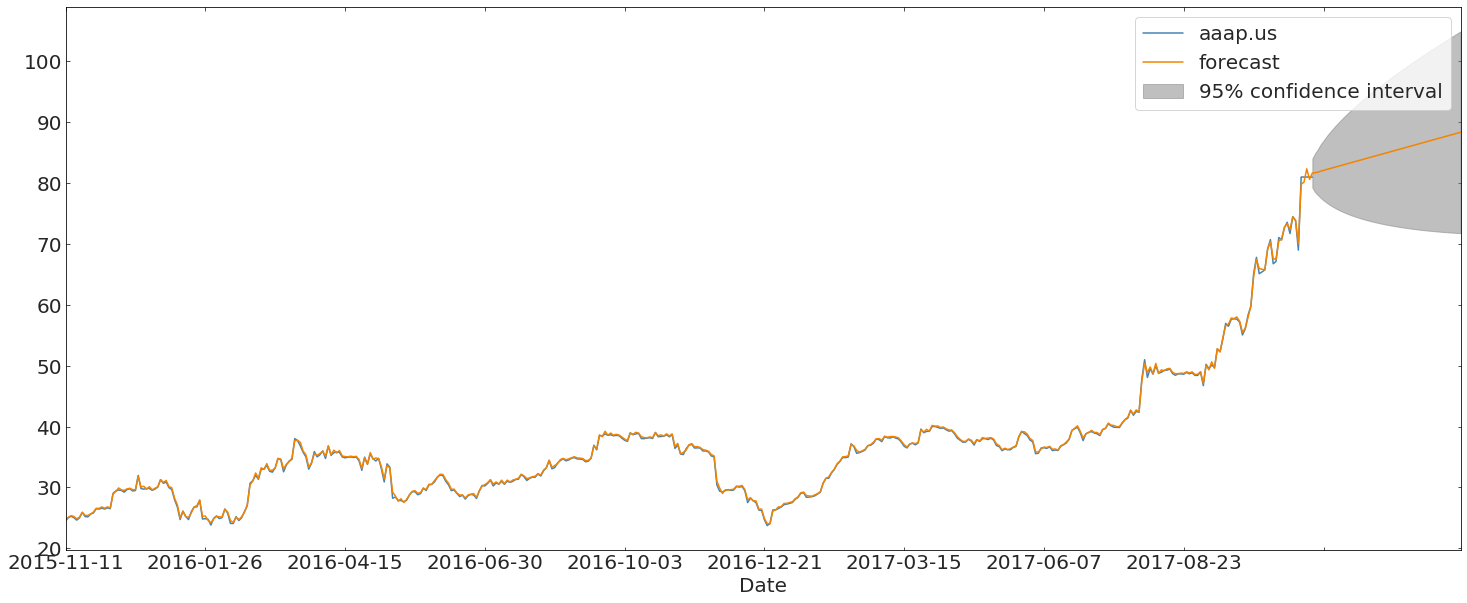

In [0]:
ax = tss[['aaap.us']].plot(figsize=(25,10))
model_fit.plot_predict(end=500, plot_insample=False, ax=ax);

# Non Stationary Example 3

In [0]:
aics_st3 = np.zeros((5,5))

from statsmodels.tsa.arima_model import ARIMA
model3 = ARIMA(tss[['aan.us']], order=(5,1,0))
model_fit3 = model3.fit(disp=0)
print(model_fit3.summary())

d = 1
for p in range(5):
    for q in range(5):
        try :
            #model3_v2 = ARIMA(tss[['aan.us']], order=(p,d,q))
            model3_v2 = ARIMA(tss[['aan.us']], order=(5,1,0))

            model_fit3_v2 = model3_v2.fit(disp=0)
            #mod = sm.tsa.ARMA(tss[['aaap.us']], (p, d, q)).fit()
            #print(model_fit.aic)
            aics_st3[p,q] = model_fit3_v2.aic
        except :
            pass
print("best parameters: ", np.where(aics_st3 == np.nanmin(aics_st3)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.aan.us   No. Observations:                  446
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -529.672
Method:                       css-mle   S.D. of innovations              0.793
Date:                Thu, 27 Feb 2020   AIC                           1073.344
Time:                        04:22:42   BIC                           1102.046
Sample:                             1   HQIC                          1084.660
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0276      0.036      0.773      0.440      -0.042       0.098
ar.L1.D.aan.us    -0.0283      0.047     -0.597      0.551      -0.121       0.065
ar.L2.D.aan.us     0.0326      0.047

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

best parameters:  (array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4]), array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]))


In [0]:
print(aics_st3)

[[1073.34366636 1073.34366636 1073.34366636 1073.34366636 1073.34366636]
 [1073.34366636 1073.34366636 1073.34366636 1073.34366636 1073.34366636]
 [1073.34366636 1073.34366636 1073.34366636 1073.34366636 1073.34366636]
 [1073.34366636 1073.34366636 1073.34366636 1073.34366636 1073.34366636]
 [1073.34366636 1073.34366636 1073.34366636 1073.34366636 1073.34366636]]


# Good fit

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


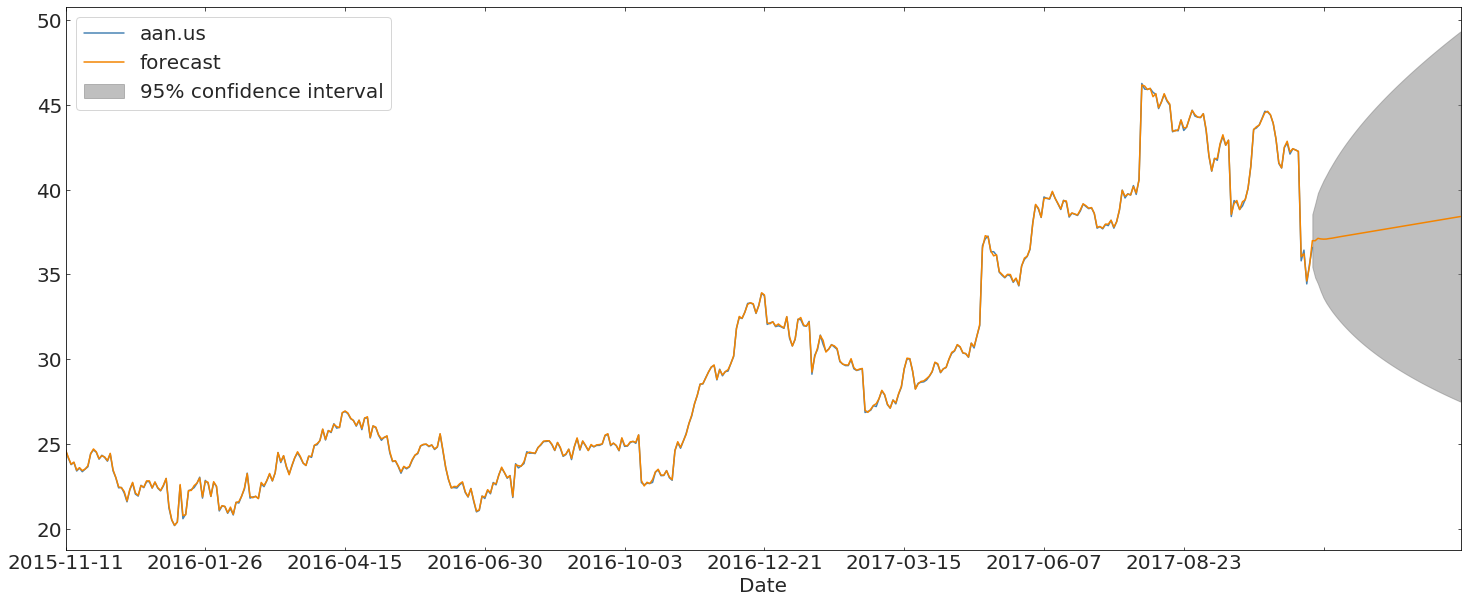

In [0]:
ax = tss[['aan.us']].plot(figsize=(25,10))
model_fit3_v2.plot_predict(end=500, plot_insample=False, ax=ax);

In [0]:
#np.where(aics[0] == np.nanmin(aics[0])), np.where(aics[1] == np.nanmin(aics[1]))

In [0]:
'''
ax = tss[lcs[0]].plot(figsize=(15,5))
mod = sm.tsa.ARIMA(tss[lcs[0]], (np.where(aics[0] == np.nanmin(aics[0]))[0][0], 2,  
                                 np.where(aics[0] == np.nanmin(aics[0]))[1][0])).fit()    
mod.plot_predict(end=500, plot_insample=False, ax=ax);
'''

'\nax = tss[lcs[0]].plot(figsize=(15,5))\nmod = sm.tsa.ARIMA(tss[lcs[0]], (np.where(aics[0] == np.nanmin(aics[0]))[0][0], 2,  \n                                 np.where(aics[0] == np.nanmin(aics[0]))[1][0])).fit()    \nmod.plot_predict(end=500, plot_insample=False, ax=ax);\n'

In [0]:
'''
ax = tss[lcs[1]].plot(figsize=(15,5))
mod = sm.tsa.ARIMA(tss[lcs[1]], (np.where(aics[1] == np.nanmin(aics[1]))[0][0], 2,  
                                 np.where(aics[1] == np.nanmin(aics[1]))[1][0])).fit()    
mod.plot_predict(end=500, plot_insample=False, ax=ax);
'''

'\nax = tss[lcs[1]].plot(figsize=(15,5))\nmod = sm.tsa.ARIMA(tss[lcs[1]], (np.where(aics[1] == np.nanmin(aics[1]))[0][0], 2,  \n                                 np.where(aics[1] == np.nanmin(aics[1]))[1][0])).fit()    \nmod.plot_predict(end=500, plot_insample=False, ax=ax);\n'

# Redo the fit to one of the non-stsationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?

# Non-stationary data repeat with different order of integration
# d = 10

In [0]:
aics_st4 = np.zeros((5,5))

from statsmodels.tsa.arima_model import ARIMA
model4 = ARIMA(tss[['aan.us']], order=(5,1,0))
model_fit4 = model4.fit(disp=0)
print(model_fit4.summary())

d = 10
for p in range(5):
    for q in range(5):
        try :
            #model3_v2 = ARIMA(tss[['aan.us']], order=(p,d,q))
            model3_v3 = ARIMA(tss[['aan.us']], order=(5,1,0))

            model_fit3_v3 = model3_v3.fit(disp=0)
            #mod = sm.tsa.ARMA(tss[['aaap.us']], (p, d, q)).fit()
            #print(model_fit.aic)
            aics_st4[p,q] = model_fit3_v3.aic
        except :
            pass
print("best parameters: ", np.where(aics_st4 == np.nanmin(aics_st4)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.aan.us   No. Observations:                  446
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -529.672
Method:                       css-mle   S.D. of innovations              0.793
Date:                Thu, 27 Feb 2020   AIC                           1073.344
Time:                        04:25:02   BIC                           1102.046
Sample:                             1   HQIC                          1084.660
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0276      0.036      0.773      0.440      -0.042       0.098
ar.L1.D.aan.us    -0.0283      0.047     -0.597      0.551      -0.121       0.065
ar.L2.D.aan.us     0.0326      0.047

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored wh

best parameters:  (array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4]), array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4]))


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


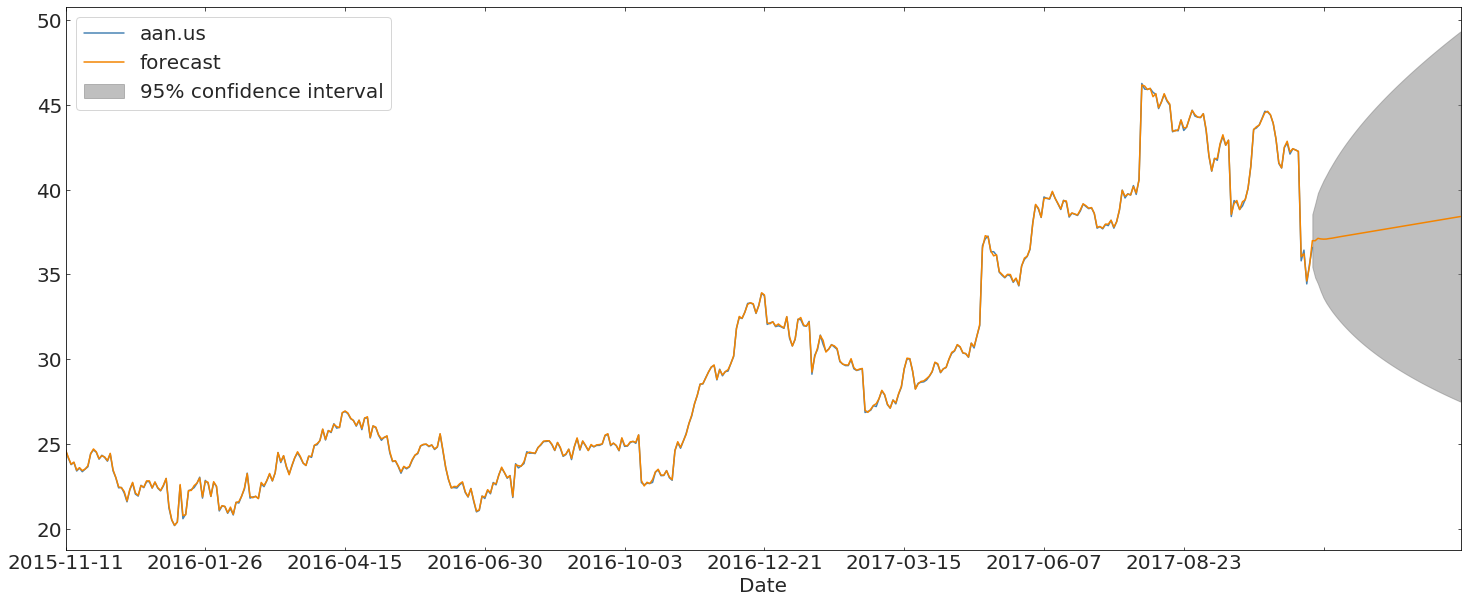

In [0]:
ax = tss[['aan.us']].plot(figsize=(25,10))
model_fit3_v3.plot_predict(end=500, plot_insample=False, ax=ax);

# What do the coefficients tell you?

d = 1 (Case 1 and 2)

In [0]:
model_fit3_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.aan.us   No. Observations:                  446
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -529.672
Method:                       css-mle   S.D. of innovations              0.793
Date:                Thu, 27 Feb 2020   AIC                           1073.344
Time:                        04:32:17   BIC                           1102.046
Sample:                             1   HQIC                          1084.660
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0276      0.036      0.773      0.440      -0.042       0.098
ar.L1.D.aan.us    -0.0283      0.047     -0.597      0.551      -0.121       0.065
ar.L2.D.aan.us     0.0326      0.047      0.688      0.492      -0.060       0.126
ar.L3.D.aan.us    -0.0100      0.048     -0.209      0.835      -0.104       0.084
ar.L4.D.aan.us     0.0054      0.048      0.114      0.910      -0.088       0.099
ar.L5.D.aan.us    -0.0522      0.052     -1.009      0.314      -0.153       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7090           -0.0000j            1.7090           -0.5000
AR.2            1.4818           -1.0543j            1.8186           -0.0984
AR.3            1.4818           +1.0543j            1.8186            0.0984
AR.4           -0.5753           -1.7496j            1.8418           -0.3006
AR.5           -0.5753           +1.7496j            1.8418            0.3006
-----------------------------------------------------------------------------
"""

d = 10

In [0]:
model_fit3_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.aan.us   No. Observations:                  446
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -529.672
Method:                       css-mle   S.D. of innovations              0.793
Date:                Thu, 27 Feb 2020   AIC                           1073.344
Time:                        04:33:17   BIC                           1102.046
Sample:                             1   HQIC                          1084.660
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0276      0.036      0.773      0.440      -0.042       0.098
ar.L1.D.aan.us    -0.0283      0.047     -0.597      0.551      -0.121       0.065
ar.L2.D.aan.us     0.0326      0.047      0.688      0.492      -0.060       0.126
ar.L3.D.aan.us    -0.0100      0.048     -0.209      0.835      -0.104       0.084
ar.L4.D.aan.us     0.0054      0.048      0.114      0.910      -0.088       0.099
ar.L5.D.aan.us    -0.0522      0.052     -1.009      0.314      -0.153       0.049
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7090           -0.0000j            1.7090           -0.5000
AR.2            1.4818           -1.0543j            1.8186           -0.0984
AR.3            1.4818           +1.0543j            1.8186            0.0984
AR.4           -0.5753           -1.7496j            1.8418           -0.3006
AR.5           -0.5753           +1.7496j            1.8418            0.3006
-----------------------------------------------------------------------------
"""

For d = 1 and d = 10, I don't see any change in coefficients and its standard deviation. I also see same AIC and BIC and hence same fiiting. From my understanding, I would hope to see some effect of 'd' on result but I see none here.  

# END of Homework 2 !